# Ex00

#### Objective: Visualizing Data from exercise 01 in pie chart view

Let's check the Data we have:

- event_time
- event_type
- product_id
- price
- user_id
- user_session
- category_id
- category_code
- brand

Here, they are asking for the event_type. So let's start

First of all we have to import all the necessary libraries:

In [21]:
# Install required libraries
!pip install pandas matplotlib sqlalchemy psycopg2

In [23]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

We have to connect with the database:

In [24]:
DB_NAME = "piscineds"
USER = "ojimenez"
PASSWORD = "mysecretpassword"
HOST = "localhost"
PORT = "5432"

# Let's connect with a SQLAlchemy engine (With psycopg2 we have a Warning):
engine_url = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"
engine = create_engine(engine_url)

try:
    with engine.connect() as connection:
        print("Connected to the database successfully!")
except Exception as e:
    print(f"Error connecting to the database: {e}")


Connected to the database successfully!


Now, we are going upload in a pandas dataframe (df) a new table only with the event_type field and also the count of each type of group: 

In [34]:
query = """
    SELECT event_type, COUNT(*) AS event_count_number
    FROM customers
    GROUP BY event_type;
"""

try:
    data = pd.read_sql(query, engine)
    data_cleaned = data.dropna()
    print("Query executed successfully :)")
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()
    

Query executed successfully :)


##### Now we have the data successfully upload. Now we have to visualize the data as a __pie chart__. We are going to use __matplotlib__ library.

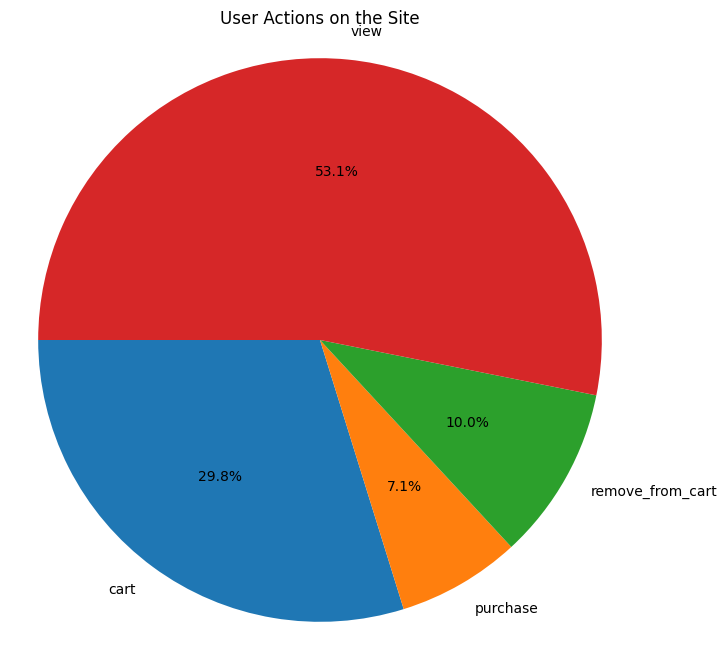

In [38]:
# Prepare the data for the pie chart
labels = data_cleaned['event_type']
sizes = data_cleaned['event_count_number']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
plt.title('User Actions on the Site')
plt.axis('equal')

# Display the chart
plt.show()

That's It! :)